In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
names = [
    "d1_bends_mean",
    "d1_bends_std",
    "d1_split_mean",
    "d1_split_std",
    "d1_posit_mean",
    "d1_posit_std",
    "d2_bends_mean",
    "d2_bends_std",
    "d2_split_mean",
    "d2_split_std",
    "d2_posit_mean",
    "d2_posit_std",
    "class"
]
races = pd.read_csv("data/data_train.csv", names=names)

In [3]:
races.head()

,d1_bends_mean,d1_bends_std,d1_split_mean,d1_split_std,d1_posit_mean,d1_posit_std,d2_bends_mean,d2_bends_std,d2_split_mean,d2_split_std,d2_posit_mean,d2_posit_std,class
0,1.6,1.517,5.284,0.063,0.707,3.0,-1.4,1.673,4.836,0.845,0.837,3.8,0
1,2.0,1.581,5.186,0.036,1.517,2.6,0.4,1.949,5.194,0.052,1.789,3.8,1
2,-0.4,2.302,5.068,0.030,1.924,3.8,-0.6,2.608,5.106,0.110,2.302,3.6,0
3,0.0,1.225,5.068,0.065,1.924,2.8,-0.2,1.789,5.178,0.034,1.643,3.2,1
4,-1.6,1.140,5.046,0.065,1.871,4.0,-0.4,1.140,2.860,2.100,1.643,2.2,0


In [82]:
races["d1_posit_std"].describe()

count    204.000000
mean       3.146162
std        0.846969
min        1.000000
25%        2.600000
50%        3.000000
75%        3.800000
max        5.800000
Name: d1_posit_std, dtype: float64

In [11]:
races.dropna(inplace=True)

In [110]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [129]:
pca = PCA(n_components=4)
scaler = StandardScaler()

In [130]:
x_pca = pca.fit_transform(scaler.fit_transform(races.drop([
    "d1_posit_mean", 
    "d1_bends_mean", 
    "d1_split_mean", 
    "d2_posit_mean", 
    "d2_bends_mean", 
    "d2_split_mean"], axis=1)))

In [131]:
x_pca.shape

(204, 4)

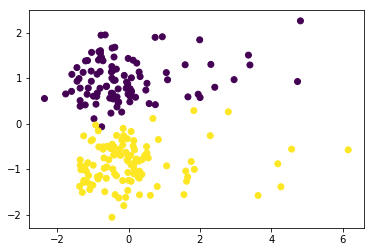

In [136]:
plt.scatter(x_pca[:,0], x_pca[:,2], c=races["class"])

In [147]:
x_data = np.column_stack((x_pca[:,0], x_pca[:,2]))

In [160]:
from sklearn.model_selection import train_test_split

In [168]:
X_train, X_test, y_train, y_test = train_test_split(x_data, races["class"], test_size=0.50, random_state=42)

In [169]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [170]:
clf = KNeighborsClassifier(n_neighbors=2)

In [171]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [172]:
y_pred = clf.predict(X_test)

In [173]:
print(classification_report(y_true=y_test, y_pred=y_pred))

             precision    recall  f1-score   support

          0       1.00      0.96      0.98        48
          1       0.96      1.00      0.98        54

avg / total       0.98      0.98      0.98       102

